In [2]:
#picked out only four categories 
categories = ['rec.autos', 'sci.space','misc.forsale', 'sci.electronics']
categories

['rec.autos', 'sci.space', 'misc.forsale', 'sci.electronics']

In [3]:
#imported 20 newsgroups from sklearn.datasets library 
from sklearn.datasets import fetch_20newsgroups

In [4]:
#removed headers, footers, and quotes from the four categories mentioned above
#made sure to shuffle and to set a random state
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'),
                              categories=categories, shuffle=True, random_state=39)

In [5]:
#print train target names 
train.target_names

['misc.forsale', 'rec.autos', 'sci.electronics', 'sci.space']

In [6]:
#length of train data and filenames
len(train.data)
len(train.filenames)

2363

In [7]:
#print the first 10 rows of the first record on file and seperated by line
print("\n".join(train.data[0].split("\n")[:10]))

FOR SALE:

  486 DX/33 Motherboard for sale.  Excellent condition...less than

  one year old.  64K cache, expandable to 256K.  RAM expandable to 32MB.

  AMI BIOS.  Need to sell...upgrading.  

  Asking:  $600.00 (neg.)



In [8]:
#print the first 10 rows of the second record on file and seperated by line
print("\n".join(train.data[1].split("\n")[:10]))

From article <eabu288-140493210752@dialin33635.slip.nts.uci.edu>, by eabu288@orion.oac.uci.edu (Alvin):

--Could be.  Isn't the 2.5 liter six supposed to be enlarged to 2.8 liters
  in the not-too-distant future?

--Aamir Qazi

-- 


In [9]:
#print the first 10 rows of the third record on file and seperated by line
print("\n".join(train.data[2].split("\n")[:10]))



Indeed! Word is, Intel's lawsuit against AMD was absolutely THROWN OUT of
court Monday! AMD said they would be shipping chips WITH THE INTEL INSTRUCTION
SET next week!!! 486 chip prices are going to go through the floor,
mark my words!!!

Regards,
Gordon.



In [10]:
#print the first 10 rows of the fourth record on file and seperated by line
print("\n".join(train.data[3].split("\n")[:10]))

Hi,

Since the original buyer found out he couldn't use this modem
for his Mac (I beleive I mentioned that it's an internal in my
former post), the modem is re-available now.  This modem is
SupraFaxModem V.32bis.  If interested, please e-mail.

Thanks!


In [11]:
#print the first 10 rows of the eleventh record on file and seperated by line
print("\n".join(train.data[10].split("\n")[:10]))


)Do you know what frequencies chanels 17 to 19 use and what is usually 
)allocated to those frequencies for broadcast outside of cable?

17 is air comm.
18 is amateur
19 is business and public service



In [12]:
#print target name for the first record
print(train.target_names[train.target[0]])

misc.forsale


In [13]:
#print target name for the second record
print(train.target_names[train.target[1]])

rec.autos


In [14]:
#print target name for the third record
print(train.target_names[train.target[2]])

misc.forsale


In [15]:
#print target name for the fourth record
print(train.target_names[train.target[3]])

misc.forsale


In [16]:
#print target name for the eleventh record
print(train.target_names[train.target[10]])

sci.electronics


In [17]:
#print an array of the first ten target names
train.target[:10]

array([0, 1, 0, 0, 3, 1, 3, 0, 1, 0])

In [18]:
#print the first twenty target names in a list
for t in train.target[:20]:
    print(train.target_names[t])

misc.forsale
rec.autos
misc.forsale
misc.forsale
sci.space
rec.autos
sci.space
misc.forsale
rec.autos
misc.forsale
sci.electronics
sci.electronics
misc.forsale
sci.space
sci.space
rec.autos
sci.space
misc.forsale
sci.electronics
sci.electronics


In [19]:
#from sklearn.feature_extraction import CountVectorizer feature
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#extracting features from train files
vecto = CountVectorizer()
X_train = vecto.fit_transform(train.data) #sparse matrix structure of text data turned into numeric
X_train.shape #shape of the sparse matrix

(2363, 25061)

In [21]:
#N-grams of words of consecutive characters
vecto.vocabulary_.get(u'algorithm')

3398

In [22]:
#downscaling using the TfidTransformer
from sklearn.feature_extraction.text import TfidfTransformer
tf_trans = TfidfTransformer(use_idf=False).fit(X_train) #“Term Frequency times Inverse Document Frequency” using tf
X_train_tf = tf_trans.transform(X_train) 
X_train_tf.shape #shape of object 

(2363, 25061)

In [23]:
#“Term Frequency times Inverse Document Frequency” using tfidf
tfidf_trans = TfidfTransformer() 
X_train_tfidf = tfidf_trans.fit_transform(X_train)
X_train_tfidf.shape #shape of object 

(2363, 25061)

In [24]:
#importing sklearn.naive_bayes multinomial and training Naive Bayes classifier 
from sklearn.naive_bayes import MultinomialNB
naive_cf = MultinomialNB().fit(X_train_tfidf, train.target)

In [25]:
#creating a sample text that talks about space 
new_doc_space = ['There are claims of extraterestial life in the universe.',
                 'Exploration in Mars is set to begin in 2020.', 
                 'The orgin of life started 4.3 billion years ago.']

In [26]:
#test and predict sample text with classifier 
X_new = vecto.transform(new_doc_space)
X_new_tfidf = tfidf_trans.transform(X_new)
X_new_tfidf = tfidf_trans.transform(X_new)
pred_text = naive_cf.predict(X_new_tfidf)

In [27]:
#print result 
for doc, category in zip(new_doc_space, pred_text):
    print('%r => %s' % (doc, train.target_names[category]))

'There are claims of extraterestial life in the universe.' => sci.space
'Exploration in Mars is set to begin in 2020.' => sci.space
'The orgin of life started 4.3 billion years ago.' => sci.space


In [28]:
#create multiple pieces of text that talk about various topics within the trained categories
#in the last three lines tried to trick the classifier 
doc_all = ['I am selling my dog Bruno for 100 dollars.',
           'I want to trade my 2013 Nissan Rogue for a 2017 Ford F150.',
           'GPUs are much faster than CPUs in machine learning.',
           'The Milky Way is 100 million light years across.',
            'To travel accross the universe, a person needs to be financially stable, and sell everything he/she owns.',
            'To travel accross the universe, a person needs to be financially stable, and sell every vehicle he/she owns.',
            'To travel accross the universe, a person needs to be financially stable, and sell every ford he/she owns.']
    

In [29]:
#test and predict multiple pieces of text with classifier 
X_new = vecto.transform(doc_all)
X_new_tfidf = tfidf_trans.transform(X_new)
X_new_tfidf = tfidf_trans.transform(X_new)
pred_text = naive_cf.predict(X_new_tfidf)

In [30]:
#print result
for doc, category in zip(doc_all, pred_text):
    print('%r => %s' % (doc, train.target_names[category]))

'I am selling my dog Bruno for 100 dollars.' => misc.forsale
'I want to trade my 2013 Nissan Rogue for a 2017 Ford F150.' => rec.autos
'GPUs are much faster than CPUs in machine learning.' => sci.electronics
'The Milky Way is 100 million light years across.' => sci.space
'To travel accross the universe, a person needs to be financially stable, and sell everything he/she owns.' => rec.autos
'To travel accross the universe, a person needs to be financially stable, and sell every vehicle he/she owns.' => sci.space
'To travel accross the universe, a person needs to be financially stable, and sell every ford he/she owns.' => rec.autos


In [31]:
#build a pipeline for the classifer
from sklearn.pipeline import Pipeline
text_naivecf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()),
])    
text_naivecf.fit(train.data, train.target) #Naive classifier pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [32]:
#evaluate the performance of the test set for Naive Bayes 
import numpy as np
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'),
        categories=categories, shuffle=True, random_state=39)
test_docs = test.data
pred_naive = text_naivecf.predict(test_docs)
np.mean(pred_naive == test.target)  #print the accuracy for Naive Bayes text clasifier

0.83852511125238394

In [33]:
#evaluate the performance of the test set for linear SVM
from sklearn.linear_model import SGDClassifier
text_linsvmcf = Pipeline([('vect', CountVectorizer()),
                          ('tfidf', TfidfTransformer()),
                          ('clf', SGDClassifier(loss='hinge', penalty='l2', #left penalty equal to 12 
                                                alpha=1e-3, random_state=39,
                                                max_iter=5, tol=None)), #max iterations set to 5
                         ])
text_linsvmcf.fit(train.data, train.target)  #linear SVM pipeline

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', power_t=0.5, random_state=39, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [34]:
#evaluate the performance of the test set for linear SVM
pred_svm = text_linsvmcf.predict(test_docs)
np.mean(pred_svm == test.target) #print accuracy for linear SVM 

0.817546090273363

In [35]:
#more detailed results for the Naive Bayes classifier metrics
from sklearn import metrics
print(metrics.classification_report(test.target, pred_naive,
    target_names=test.target_names))

                 precision    recall  f1-score   support

   misc.forsale       0.93      0.83      0.87       390
      rec.autos       0.75      0.89      0.82       396
sci.electronics       0.86      0.75      0.80       393
      sci.space       0.84      0.88      0.86       394

    avg / total       0.85      0.84      0.84      1573



In [36]:
#more detailed results for the SVM classifier metrics
print(metrics.classification_report(test.target, pred_svm,
    target_names=test.target_names))

                 precision    recall  f1-score   support

   misc.forsale       0.76      0.90      0.82       390
      rec.autos       0.84      0.76      0.80       396
sci.electronics       0.83      0.76      0.79       393
      sci.space       0.86      0.85      0.85       394

    avg / total       0.82      0.82      0.82      1573



In [37]:
#confusion matrix for Naive Bayes
metrics.confusion_matrix(test.target, pred_naive)

array([[323,  37,  21,   9],
       [ 11, 353,  15,  17],
       [ 13,  47, 295,  38],
       [  2,  33,  11, 348]])

In [ ]:
#confusion matrix for SVM
metrics.confusion_matrix(test.target, pred_svm)

In [38]:
#found an electronics article online and wanted to test it with the Naive Bayes classifier 
article = ['With cell phones and implantable medical sensors smaller and lighter than ever, the antennas receiving signals must shrink as well. Enter foldable antennas from Osaka University in Japan. A team there recently printed what they call silver nanowire ink — a paste composed of 100-nanometer-wide wires, jumbled together onto paper made with fibers slightly wider than common paper. Folding or unfolding the paper tunes the wires to a range of frequencies. The highly sensitive components could be squeezed into narrower spaces within the tiniest electronic devices, making the antennas versatile enough to be applied to future foldable electronics. The pair of origami cranes above shows off the folded antenna-paper by lighting up an LED.']

In [39]:
article

['With cell phones and implantable medical sensors smaller and lighter than ever, the antennas receiving signals must shrink as well. Enter foldable antennas from Osaka University in Japan. A team there recently printed what they call silver nanowire ink — a paste composed of 100-nanometer-wide wires, jumbled together onto paper made with fibers slightly wider than common paper. Folding or unfolding the paper tunes the wires to a range of frequencies. The highly sensitive components could be squeezed into narrower spaces within the tiniest electronic devices, making the antennas versatile enough to be applied to future foldable electronics. The pair of origami cranes above shows off the folded antenna-paper by lighting up an LED.']

In [40]:
#test electronics article with classifier 
X_new1 = vecto.transform(article)
X_new_tfidf1 = tfidf_trans.transform(X_new1)
X_new_tfidf1 = tfidf_trans.transform(X_new1)
pred_text1 = naive_cf.predict(X_new_tfidf1)

In [41]:
#print the predicted result
for doc, category in zip(article, pred_text1):
    print('%r => %s' % (doc, train.target_names[category]))

'With cell phones and implantable medical sensors smaller and lighter than ever, the antennas receiving signals must shrink as well. Enter foldable antennas from Osaka University in Japan. A team there recently printed what they call silver nanowire ink — a paste composed of 100-nanometer-wide wires, jumbled together onto paper made with fibers slightly wider than common paper. Folding or unfolding the paper tunes the wires to a range of frequencies. The highly sensitive components could be squeezed into narrower spaces within the tiniest electronic devices, making the antennas versatile enough to be applied to future foldable electronics. The pair of origami cranes above shows off the folded antenna-paper by lighting up an LED.' => sci.electronics


In [42]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [43]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [44]:
#transform text 
words = str(train)
words = words.replace('*', '') #replace '*' with empty space
words = words.lower()   #lower case all words
text = words.split()    #split all words
text_str = str(text)    #create a string for 

In [45]:
#remove english stopwords
stop_words = set(stopwords.words('english'))   
clean_words = []
for w in text:
    if w not in stop_words:
        clean_words.append(w)

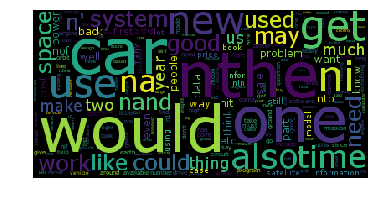

In [46]:
#create a wordcloud 
wordcloud1 = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'} 
                      ).generate(words) #words in wordcloud without stopwords
plt.imshow(wordcloud1)
plt.axis("off")
plt.show() #plot wordcloud with stop words removed

[('-', 1252), ('\\n', 1126), ('would', 840), ('space', 667), ('one', 660), ('like', 614), ('get', 577), ('new', 442), ('use', 431), ('also', 421), ('good', 406), ('may', 372), ('car', 361), ('know', 357), ('could', 347), ('used', 318), ('--', 316), ('.', 314), ('much', 300), ('|', 299)]
<FreqDist with 67042 samples and 195724 outcomes>


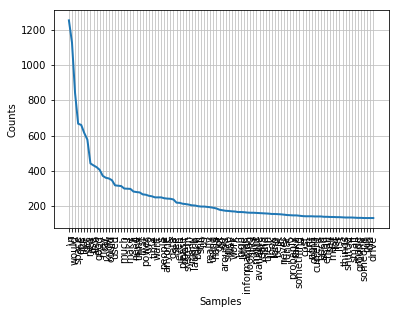

None


In [47]:
#do a frequency distribution and wordcount of the most common words
freq_words = nltk.FreqDist(clean_words)
print(freq_words.most_common(20))
print(freq_words)
print(freq_words.plot(100))

In [48]:
#print dodense matrix
X_train_tfidf.todense()

matrix([[ 0.11315997,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [49]:
#article from the internet that talks about cars
article2 = ['Chevrolet is rolling out a slew of updates to the Malibu mid-size sedan for 2019. The changes touch not only the exterior and interior appearance but also some mechanicals and infotainment offerings. There’s also a new RS trim level that finally gives Chevy an equivalent to Honda’s Accord Sport and Toyota’s Camry SE and XSE models.'] 

In [50]:
article2

['Chevrolet is rolling out a slew of updates to the Malibu mid-size sedan for 2019. The changes touch not only the exterior and interior appearance but also some mechanicals and infotainment offerings. There’s also a new RS trim level that finally gives Chevy an equivalent to Honda’s Accord Sport and Toyota’s Camry SE and XSE models.']

In [51]:
#test cars article with classifier 
X_new2 = vecto.transform(article2)
X_new_tfidf2 = tfidf_trans.transform(X_new2)
X_new_tfidf2 = tfidf_trans.transform(X_new2)
pred_text2 = naive_cf.predict(X_new_tfidf2)

In [52]:
#print the predicted result
for doc, category in zip(article2, pred_text2):
    print('%r => %s' % (doc, train.target_names[category]))

'Chevrolet is rolling out a slew of updates to the Malibu mid-size sedan for 2019. The changes touch not only the exterior and interior appearance but also some mechanicals and infotainment offerings. There’s also a new RS trim level that finally gives Chevy an equivalent to Honda’s Accord Sport and Toyota’s Camry SE and XSE models.' => rec.autos


In [53]:
#article from the internet that talks about space
article3 = ['When I first glanced at the image above, I thought I was looking at the surface of the Sun. But no, these really are mega cyclones swirling with winds up to 220 miles per hour around Jupiter’s north and south poles, as seen by NASA’s Juno spacecraft.']

In [54]:
article3

['When I first glanced at the image above, I thought I was looking at the surface of the Sun. But no, these really are mega cyclones swirling with winds up to 220 miles per hour around Jupiter’s north and south poles, as seen by NASA’s Juno spacecraft.']

In [55]:
#test space article with classifier 
X_new3 = vecto.transform(article3)
X_new_tfidf3 = tfidf_trans.transform(X_new3)
X_new_tfidf3 = tfidf_trans.transform(X_new3)
pred_text3 = naive_cf.predict(X_new_tfidf3)

In [56]:
#print the predicted result
for doc, category in zip(article3, pred_text3):
    print('%r => %s' % (doc, train.target_names[category]))

'When I first glanced at the image above, I thought I was looking at the surface of the Sun. But no, these really are mega cyclones swirling with winds up to 220 miles per hour around Jupiter’s north and south poles, as seen by NASA’s Juno spacecraft.' => sci.space


In [57]:
#text from craigslist for an item for sale
article4 = ['Desk chair for sale. Chair height is adjustable, however the chair-back does not tilt. Will include for free if purchased in conjunction with a wood desk I am also selling. See link below to view the available desk. If not, chair only is $50. ']

In [58]:
article4

['Desk chair for sale. Chair height is adjustable, however the chair-back does not tilt. Will include for free if purchased in conjunction with a wood desk I am also selling. See link below to view the available desk. If not, chair only is $50. ']

In [59]:
#test for sale text with classifier
X_new4 = vecto.transform(article4)
X_new_tfidf4 = tfidf_trans.transform(X_new4)
X_new_tfidf4 = tfidf_trans.transform(X_new4)
pred_text4 = naive_cf.predict(X_new_tfidf4)

In [60]:
#print the predicted result
for doc, category in zip(article4, pred_text4):
    print('%r => %s' % (doc, train.target_names[category]))

'Desk chair for sale. Chair height is adjustable, however the chair-back does not tilt. Will include for free if purchased in conjunction with a wood desk I am also selling. See link below to view the available desk. If not, chair only is $50. ' => misc.forsale
